In [1]:
import  pandas as pd
import os
# c:\\Users\\Fanper\\Documents\\PYTHON\\Proyectos_IA


peliculas = pd.read_csv('c:\\Users\\Fanper\\Documents\\PYTHON\\Proyectos_IA\\RatingsPeliculas.csv')

In [2]:
len(peliculas)

559

In [3]:
peliculas.head()

,Pelicula,Genero,Ratings de Rotten Tomatoes %,Ratings de la Audience %,Presupuesto (millones USD),Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [4]:
peliculas.columns = ['Pelicula', 'Genero', 'RatingsCriticos', 'RatingsAudiencia', 'PresupuestoMillones', 'Año']

In [5]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Pelicula             559 non-null    object
 1   Genero               559 non-null    object
 2   RatingsCriticos      559 non-null    int64 
 3   RatingsAudiencia     559 non-null    int64 
 4   PresupuestoMillones  559 non-null    int64 
 5   Año                  559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
peliculas.describe()

,RatingsCriticos,RatingsAudiencia,PresupuestoMillones,Año
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
peliculas.Pelicula = peliculas.Pelicula.astype("category")
peliculas.Genero = peliculas.Genero.astype("category")
peliculas.Año = peliculas.Año.astype("category")

In [8]:
peliculas.Genero.cat.categories

Index(['Accion', 'Aventura', 'Comedia', 'Drama', 'Romance', 'Suspenso',
       'Terror'],
      dtype='object')

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

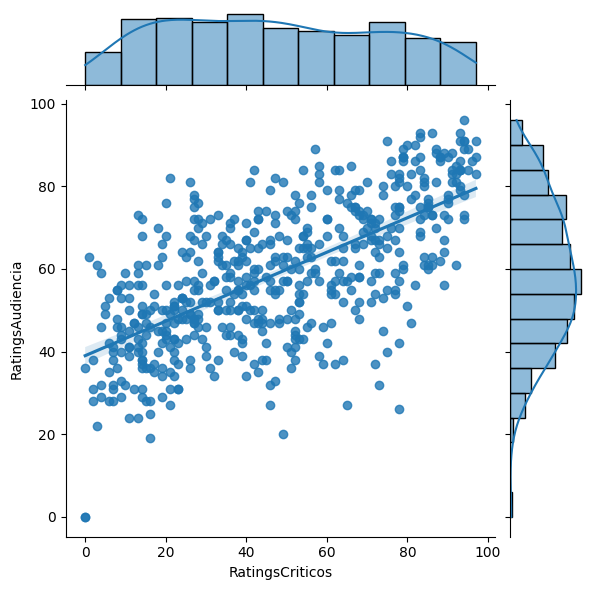

In [10]:
# Joimtplots

j = sns.jointplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", kind="reg")

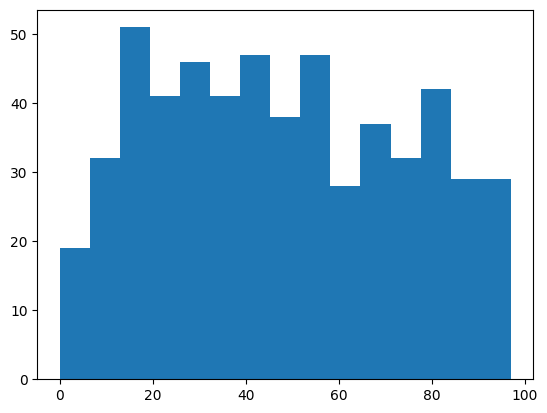

In [11]:
m1 = plt.hist(peliculas.RatingsCriticos, bins=15)

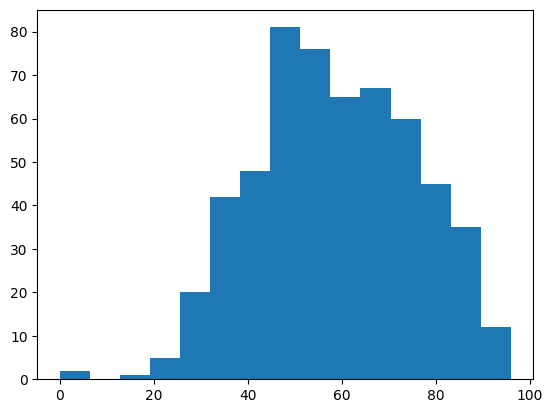

In [12]:
m2 = plt.hist(peliculas.RatingsAudiencia, bins=15)

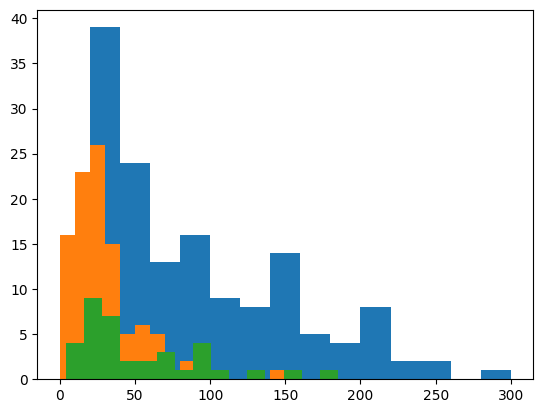

In [13]:
plt.hist(peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, bins=15)
plt.hist(peliculas[peliculas.Genero == "Drama"].PresupuestoMillones, bins=15)
plt.hist(peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones, bins=15)
plt.show()

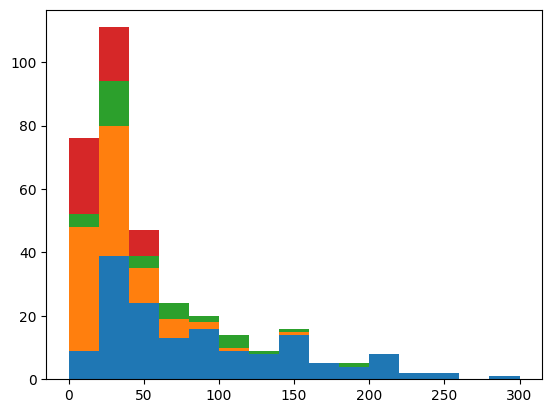

In [14]:
# Crear un histograma para los presupuestos de películas por géneros seleccionados ('Acción', 'Drama', 'Suspenso', 'Terror')
plt.hist([peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, 
        peliculas[peliculas.Genero == "Drama"].PresupuestoMillones, 
        peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones,
        peliculas[peliculas.Genero == "Terror"].PresupuestoMillones], bins=15, stacked=True)

# Mostrar el histograma
plt.show()


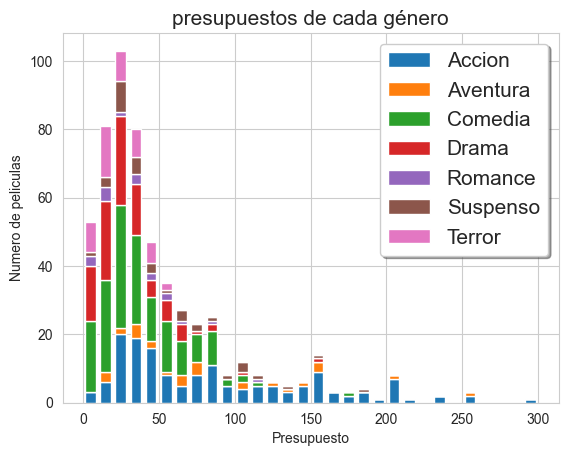

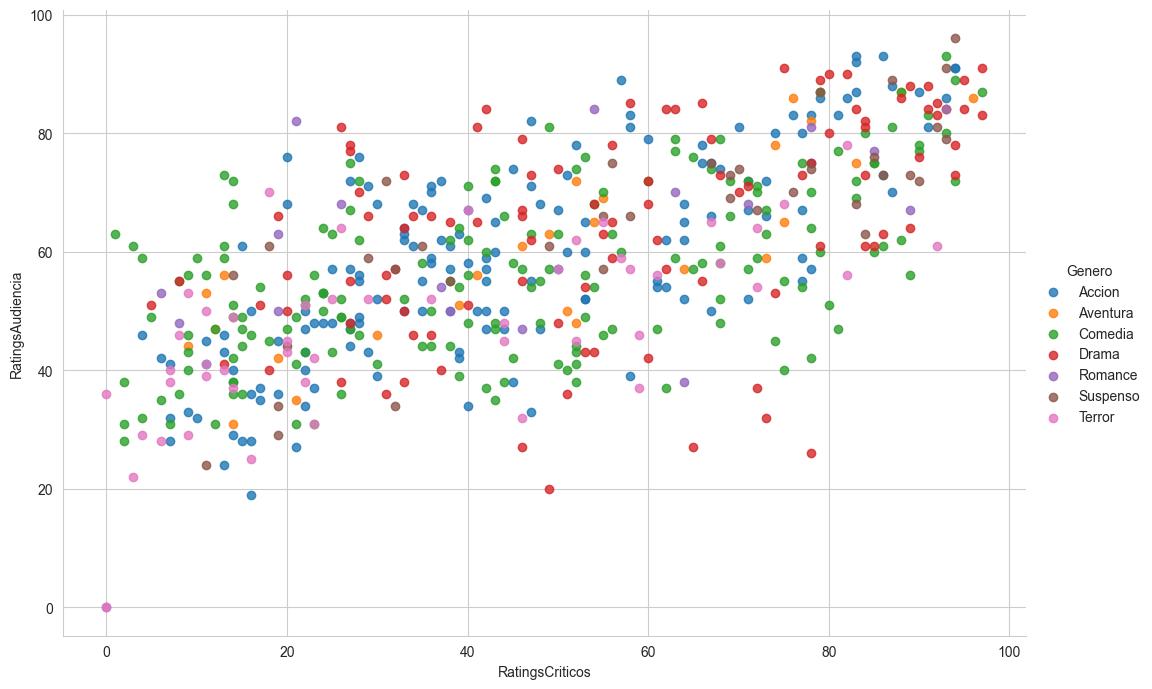

In [15]:
# Establecer el estilo del gráfico como 'darkgrid'
sns.set_style("whitegrid")

# Inicializar listas vacías para almacenar datos y etiquetas
lista1 = list()
mis_etiquetas = list()

# Recorrer las categorías de 'Genero' para obtener el presupuesto de cada una
for gen in peliculas.Genero.cat.categories:
    lista1.append(peliculas[peliculas.Genero == gen].PresupuestoMillones)
    mis_etiquetas.append(gen)

# Crear un histograma apilado con los presupuestos de cada género
plt.hist(lista1, bins=30, stacked=True, rwidth=0.7, label=mis_etiquetas)

# Añadir la leyenda al gráfico
plt.legend(fontsize = 15, fancybox= True, shadow=True)
plt.title("presupuestos de cada género", fontsize = 15)
plt.xlabel("Presupuesto")
plt.ylabel("Numero de peliculas")
plt.yticks(fontsize = 10)
# Mostrar el gráfico
plt.show()

# Crear un gráfico de regresión lineal (lmplot) sin línea de ajuste para visualizar la relación entre 'RatingsCriticos' y 'RatingsAudiencia', diferenciando por 'Genero'
vis1 = sns.lmplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", 
                fit_reg=False, hue="Genero", height=7, aspect=1.5)



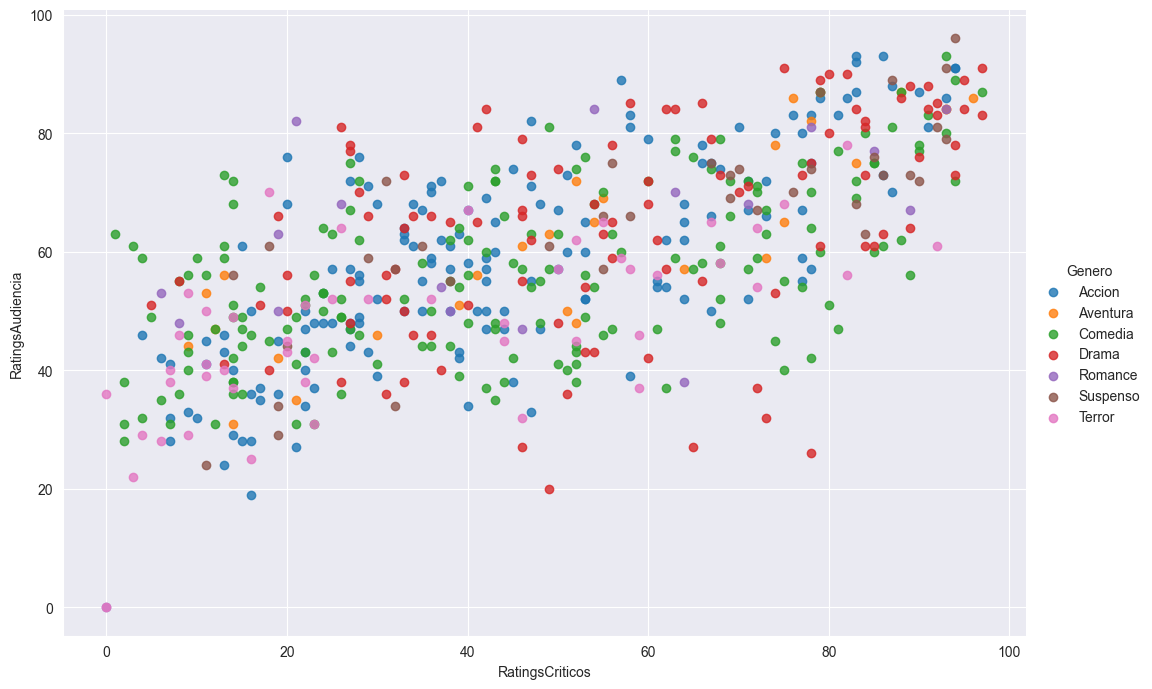

In [16]:
# Establecer el estilo del gráfico como 'darkgrid'
sns.set_style("darkgrid")

# Crear un gráfico de regresión lineal (lmplot) sin línea de ajuste para visualizar la relación entre 'RatingsCriticos' y 'RatingsAudiencia', diferenciando por 'Genero'
vis1 = sns.lmplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", 
                fit_reg=False, hue="Genero", height=7, aspect=1.5)

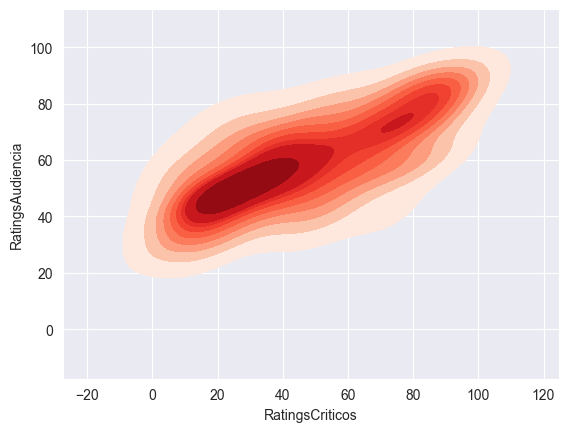

In [17]:
# Grafico KDE
# Establecer el estilo del gráfico como 'darkgrid'
sns.set_style("darkgrid")

# Crear un gráfico de densidad (KDE) sombreado para visualizar la relación entre 'RatingsCriticos' y 'RatingsAudiencia'
vis2 = sns.kdeplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", shade=True, cmap="Reds")

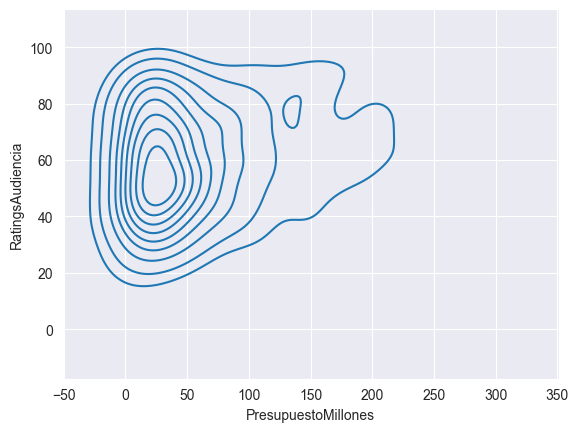

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

vis3 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsAudiencia")
plt.show()

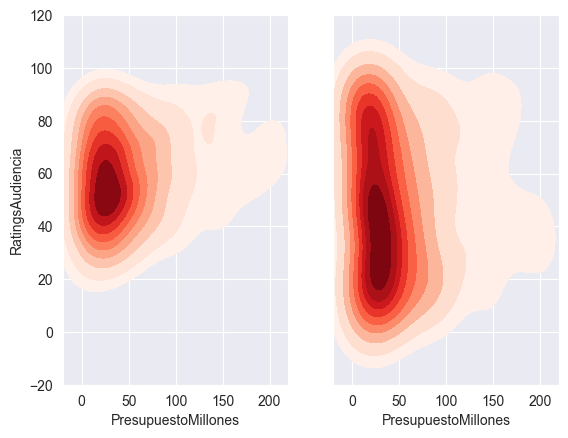

In [19]:
# Crear una figura con dos subgráficos (1 fila y 2 columnas), compartiendo los ejes X e Y
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Crear un kdeplot sombreado para mostrar la distribución del 'PresupuestoMillones' frente a 'RatingsAudiencia' en el primer subgráfico
vis3 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsAudiencia", shade=True, cmap="Reds", ax=axes[0])

# Crear un kdeplot sombreado para mostrar la distribución del 'PresupuestoMillones' frente a 'RatingsCriticos' en el segundo subgráfico
vis4 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsCriticos", shade=True, cmap="Reds", ax=axes[1])

# Ajustar los límites de los ejes X e Y en ambos gráficos
vis3.set(xlim=(-20, 220), ylim=(-20, 120))

# Mostrar la figura con ambos gráficos
plt.show()

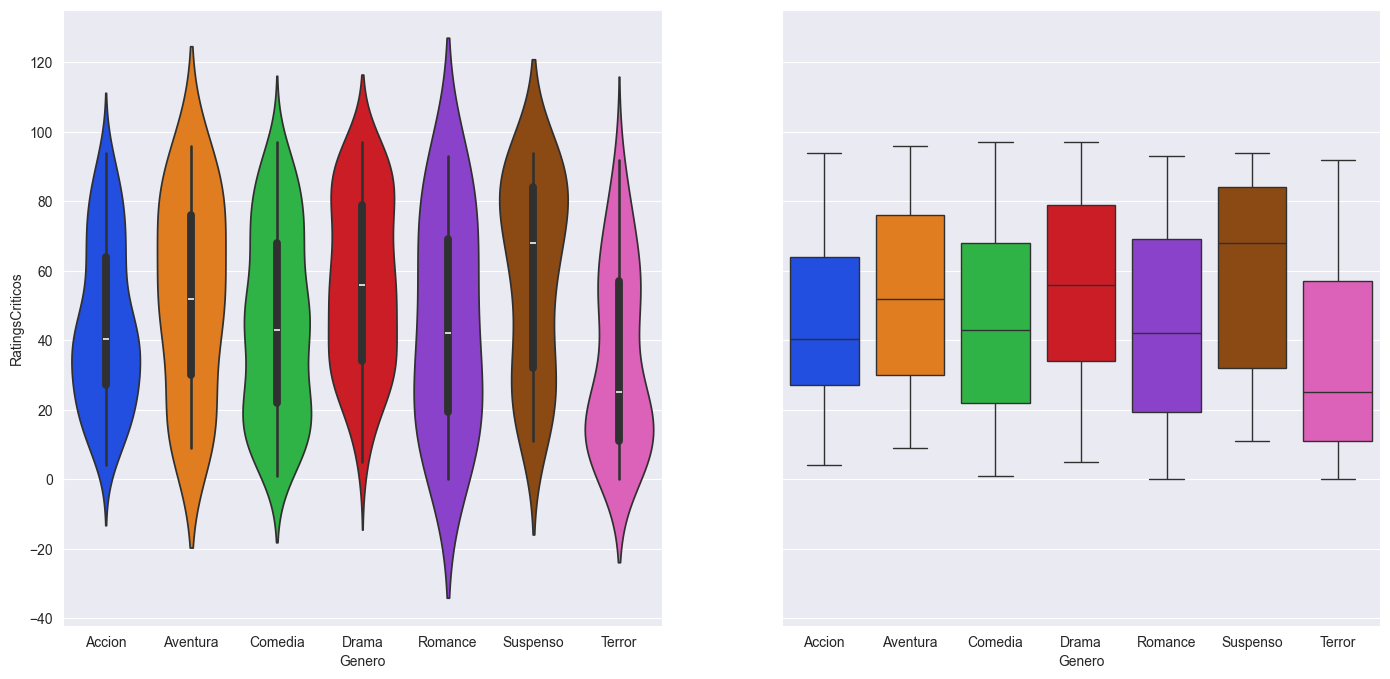

In [20]:
# Crear una figura con dos subgráficos (1 fila y 2 columnas), compartiendo los ejes X e Y, y especificando el tamaño de la figura
f, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(17, 8))

# Crear un violinplot para mostrar la relación entre 'Genero' y 'RatingsCriticos' en el primer subgráfico
vis5 = sns.violinplot(data=peliculas, x="Genero", y="RatingsCriticos", ax=axes[0], palette="bright")

# Crear un boxplot para mostrar la relación entre 'Genero' y 'RatingsCriticos' en el segundo subgráfico
vis6 = sns.boxplot(data=peliculas, x="Genero", y="RatingsCriticos", ax=axes[1], palette="bright")

# Mostrar la figura con ambos gráficos
plt.show()

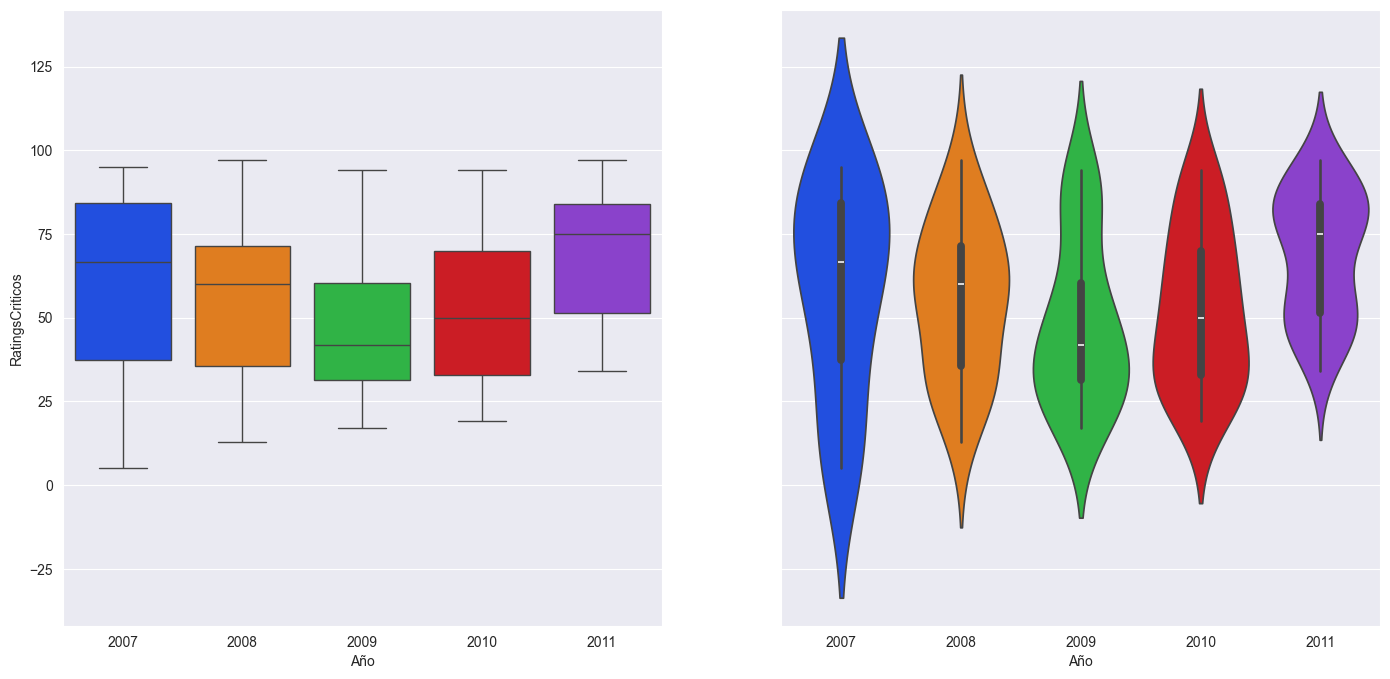

In [21]:
# Crear una figura con dos subgráficos (1 fila y 2 columnas), compartiendo los ejes X e Y, y especificando el tamaño de la figura
f, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(17, 8))

# Crear un boxplot para el género 'Drama' mostrando la relación entre 'Año' y 'RatingsCriticos' en el primer subgráfico
w = sns.boxplot(data=peliculas[peliculas.Genero == "Drama"], x="Año", y="RatingsCriticos", ax=axes[0], palette="bright")

# Crear un violinplot para el género 'Drama' mostrando la relación entre 'Año' y 'RatingsCriticos' en el segundo subgráfico
z = sns.violinplot(data=peliculas[peliculas.Genero == "Drama"], x="Año", y="RatingsCriticos", ax=axes[1], palette="bright")

# Mostrar la figura con ambos gráficos
plt.show()

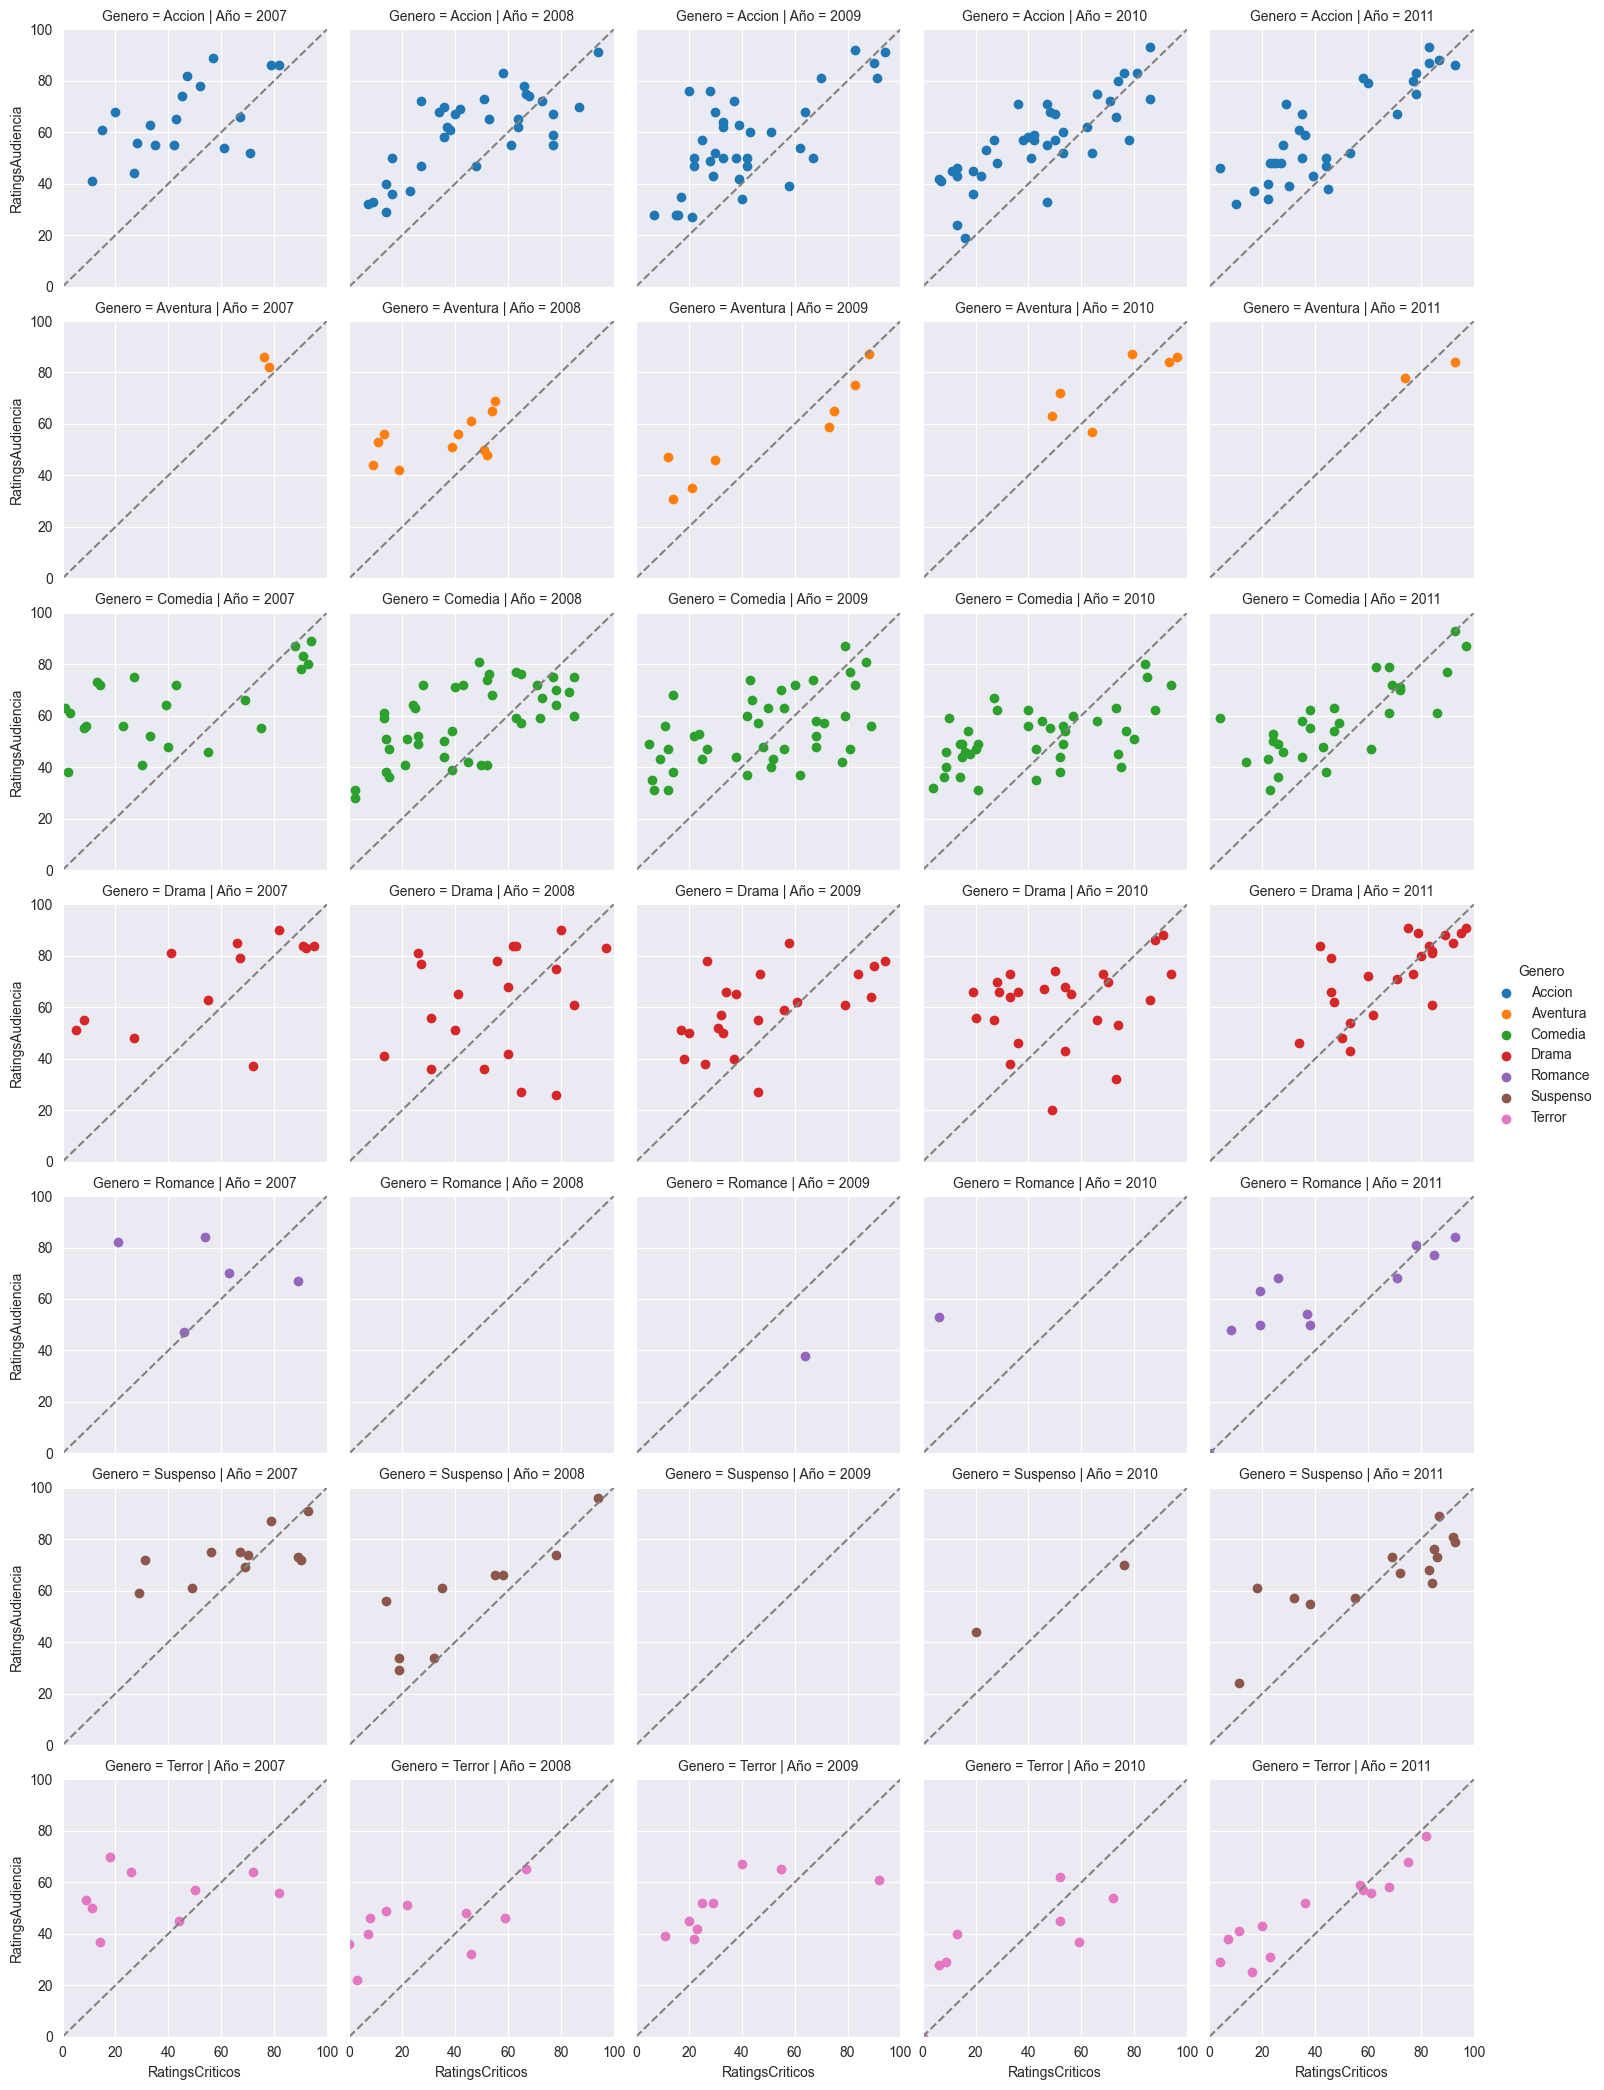

In [22]:
# Controlando ejes y Agregando diagonales

# Creando un objeto FacetGrid con filas por 'Genero' y columnas por 'Año'. Cada subgráfico tendrá un color único basado en el 'Genero'
g = sns.FacetGrid(peliculas, row="Genero", col="Año", hue="Genero")

# Graficando un diagrama de dispersión para cada combinación de 'RatingsCriticos' y 'RatingsAudiencia'
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia")

# Estableciendo los límites de los ejes X e Y para todos los gráficos en el FacetGrid
g.set(xlim=(0, 100), ylim=(0, 100))

# Agregando una línea diagonal gris a cada subgráfico para indicar la referencia (línea y=x)
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c="gray", ls="--")

# Agregando una leyenda a la gráfica
g.add_legend()

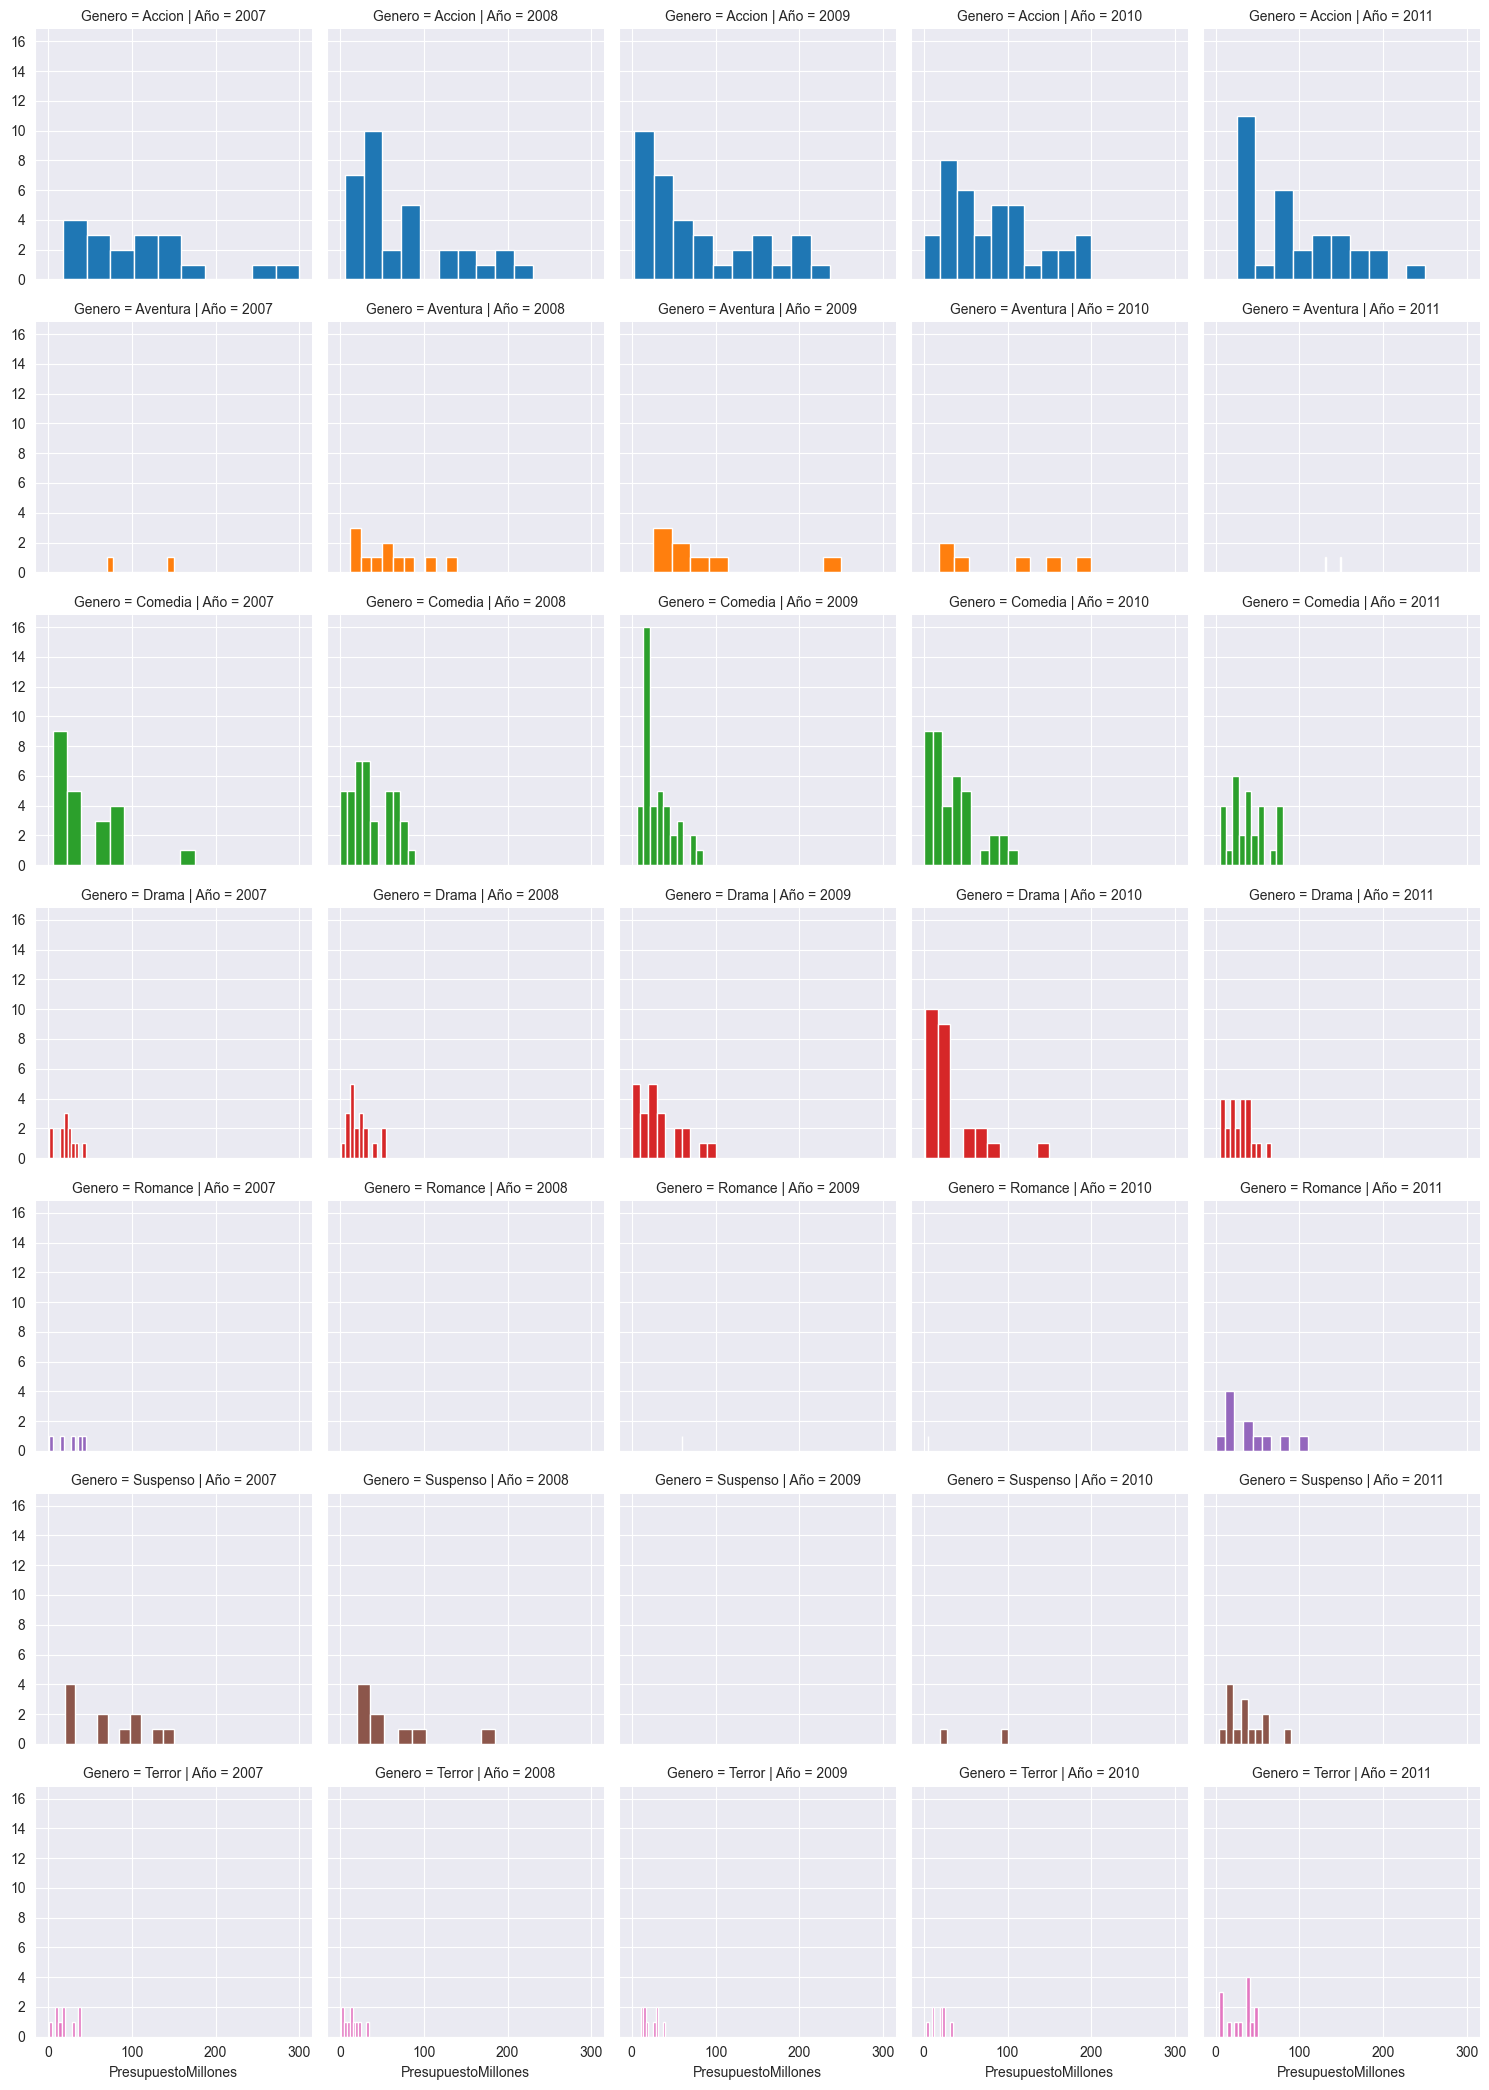

In [23]:
# Se puede rellenar con cualquier tipo de graficos. Ejemplo: Histograma
g = sns.FacetGrid(peliculas, row="Genero", col="Año", hue="Genero")
g = g.map(plt.hist, "PresupuestoMillones")

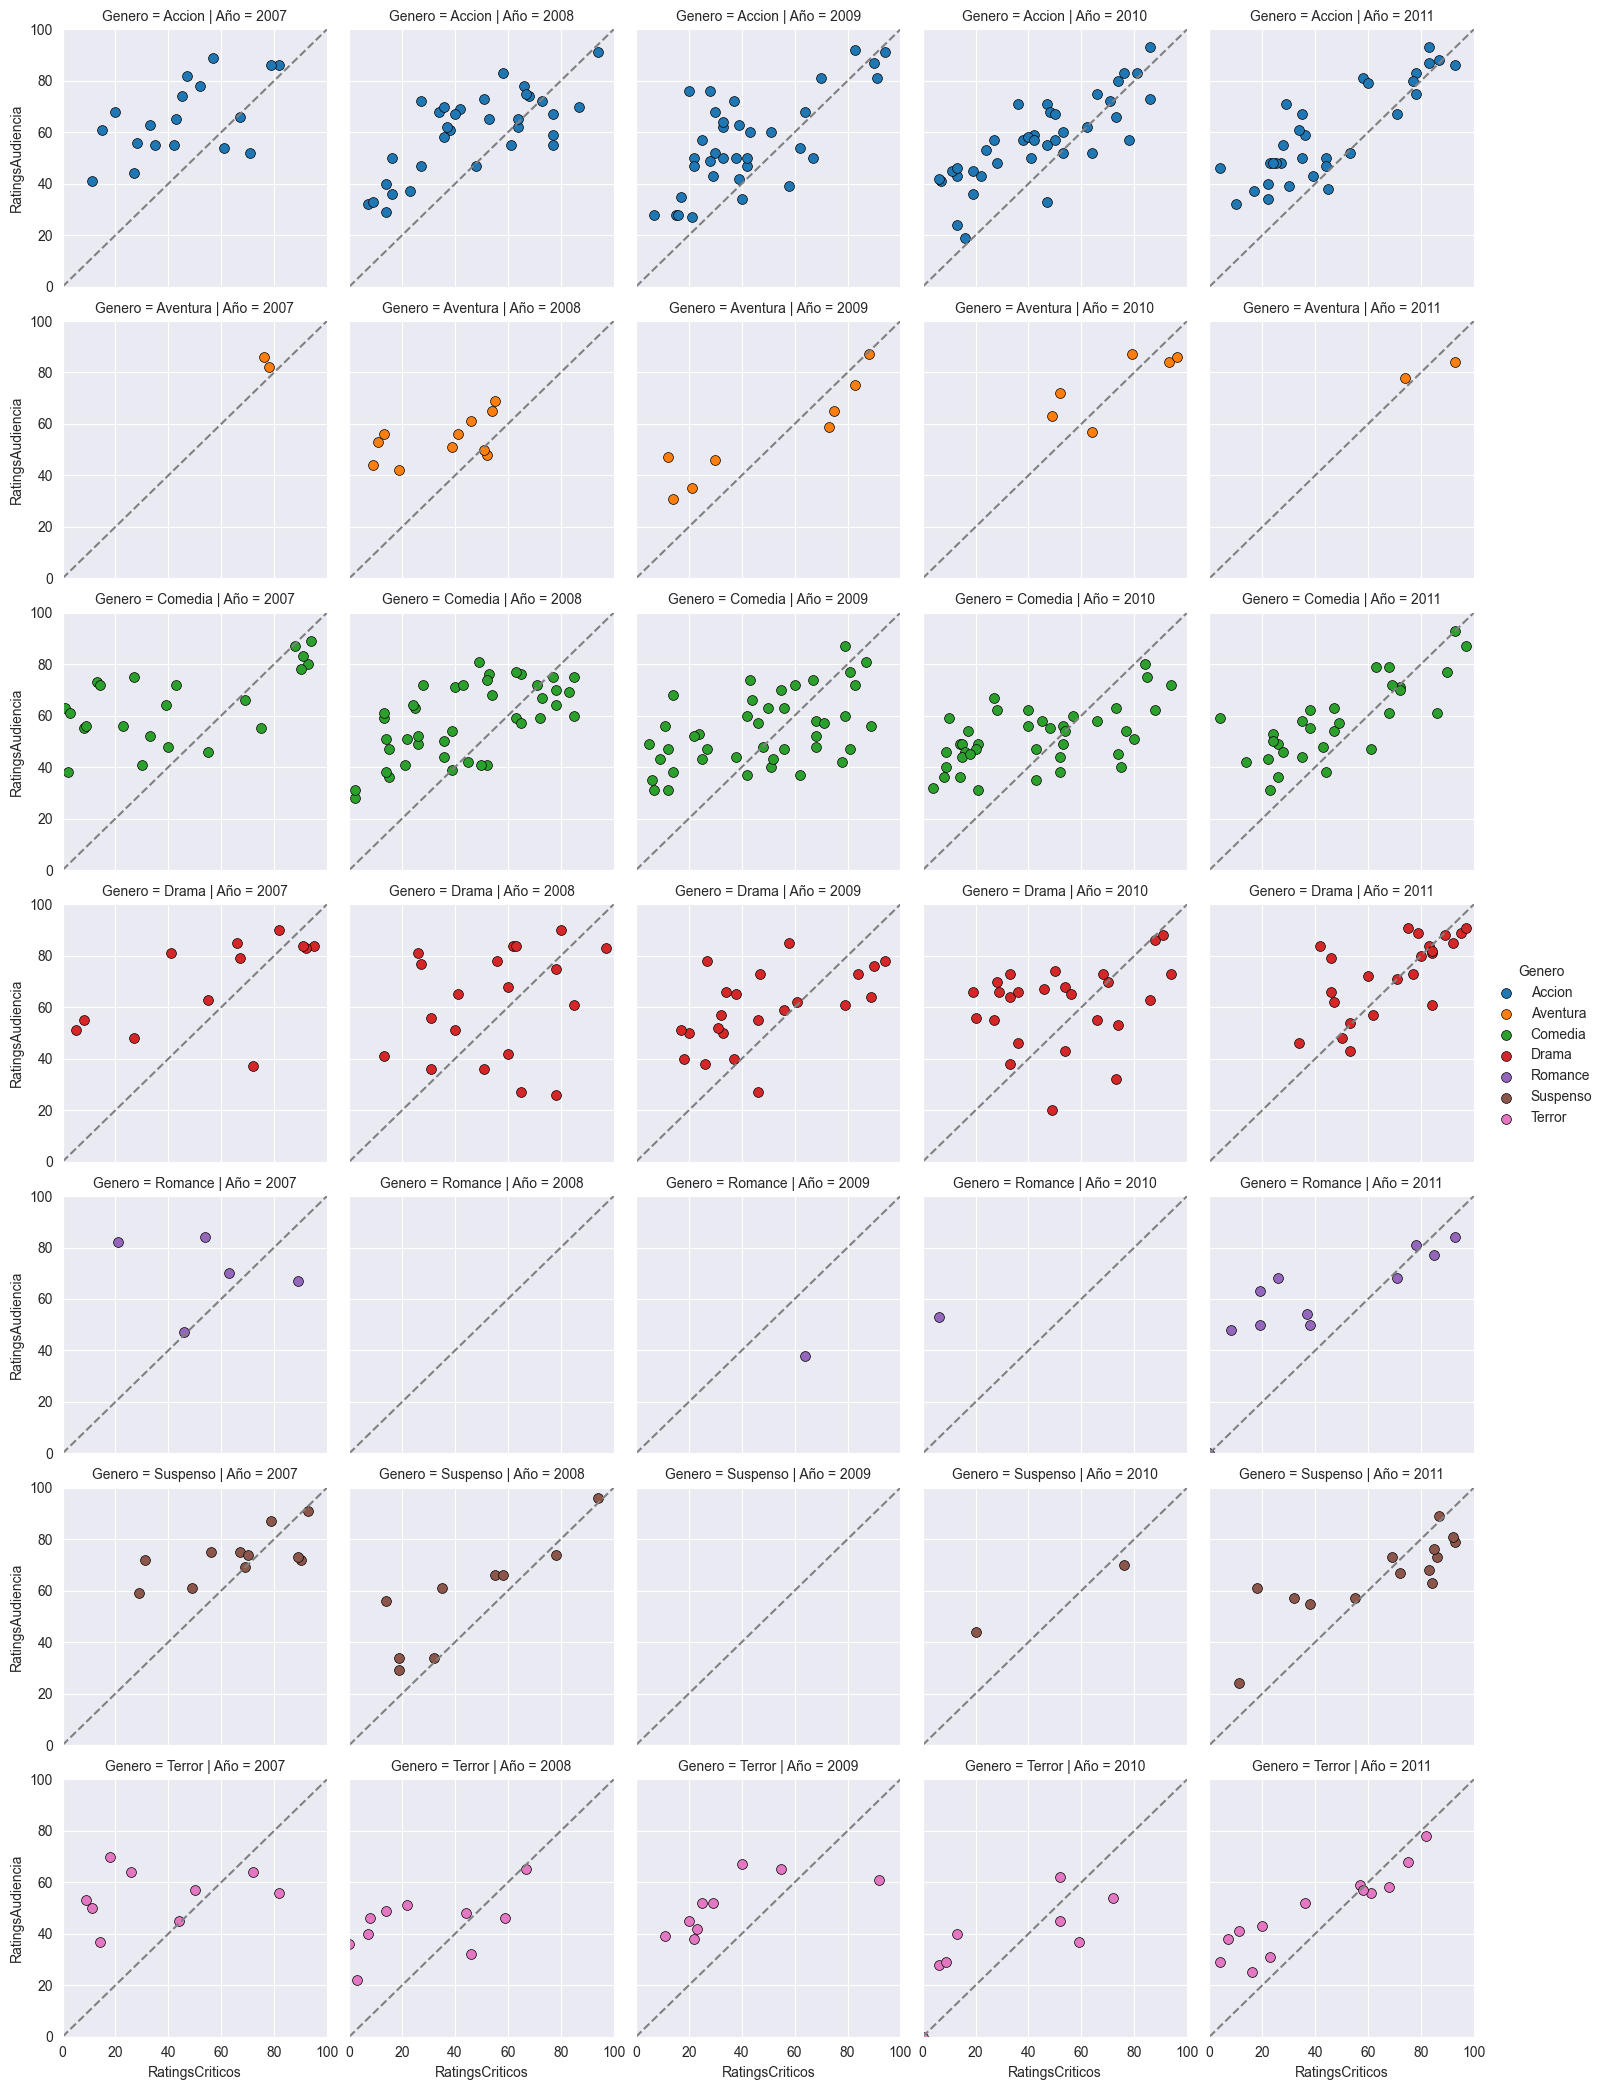

In [24]:
# Controlando ejes y Agregando diagonales

# Creando un objeto FacetGrid con filas por 'Genero' y columnas por 'Año'. Cada subgráfico tendrá un color único basado en el 'Genero'
g = sns.FacetGrid(peliculas, row="Genero", col="Año", hue="Genero")

# Definiendo argumentos adicionales para personalizar el aspecto de los puntos en el gráfico
kws = dict(s=50, linewidth=0.5, edgecolor="black")

# Graficando un diagrama de dispersión para cada combinación de 'RatingsCriticos' y 'RatingsAudiencia'
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia", **kws)

# Estableciendo los límites de los ejes X e Y para todos los gráficos en el FacetGrid
g.set(xlim=(0, 100), ylim=(0, 100))

# Agregando una línea diagonal gris a cada subgráfico para indicar la referencia (línea y=x)
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c="gray", ls="--")

# Agregando una leyenda a la gráfica
g.add_legend()

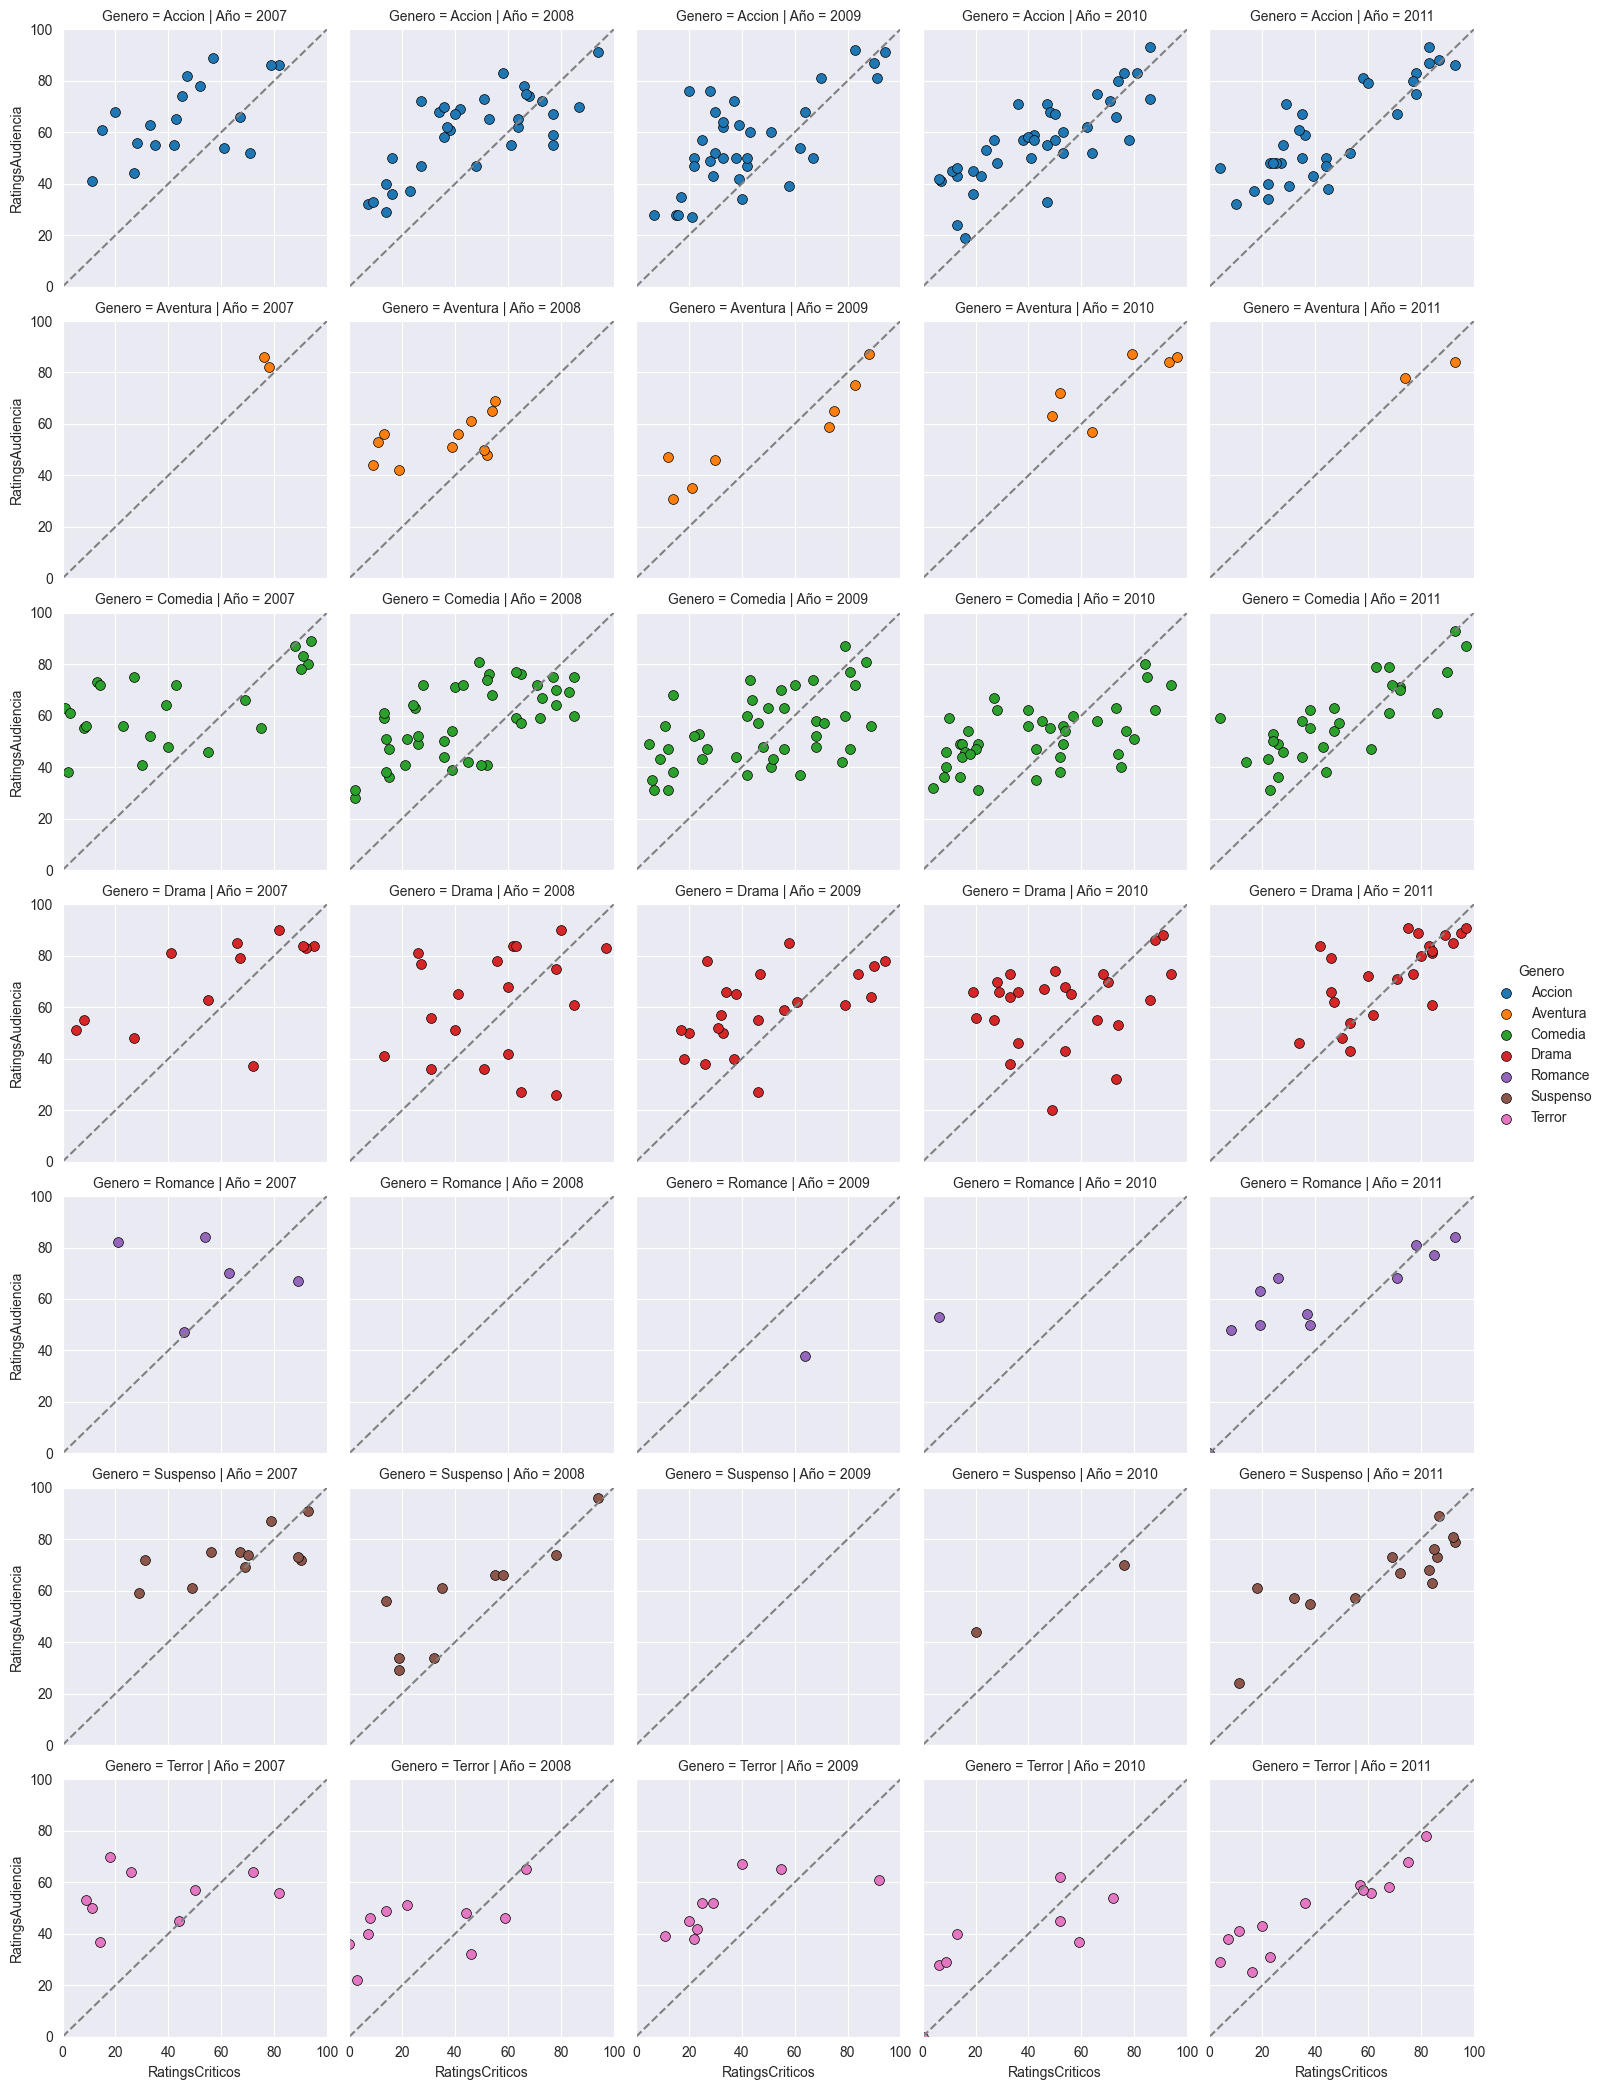

In [25]:
# Controlando ejes y Agregando diagonales

# Creando un objeto FacetGrid con filas por 'Genero' y columnas por 'Año'. Cada subgráfico tendrá un color único basado en el 'Genero'
g = sns.FacetGrid(peliculas, row="Genero", col="Año", hue="Genero")

# Definiendo argumentos adicionales para personalizar el aspecto de los puntos en el gráfico
kws = dict(s=50, linewidth=0.5, edgecolor="black")

# Graficando un diagrama de dispersión para cada combinación de 'RatingsCriticos' y 'RatingsAudiencia'
g = g.map(plt.scatter, "RatingsCriticos", "RatingsAudiencia", **kws)

# Estableciendo los límites de los ejes X e Y para todos los gráficos en el FacetGrid
g.set(xlim=(0, 100), ylim=(0, 100))

# Agregando una línea diagonal gris a cada subgráfico para indicar la referencia (línea y=x)
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c="gray", ls="--")

# Agregando una leyenda a la gráfica
g.add_legend()

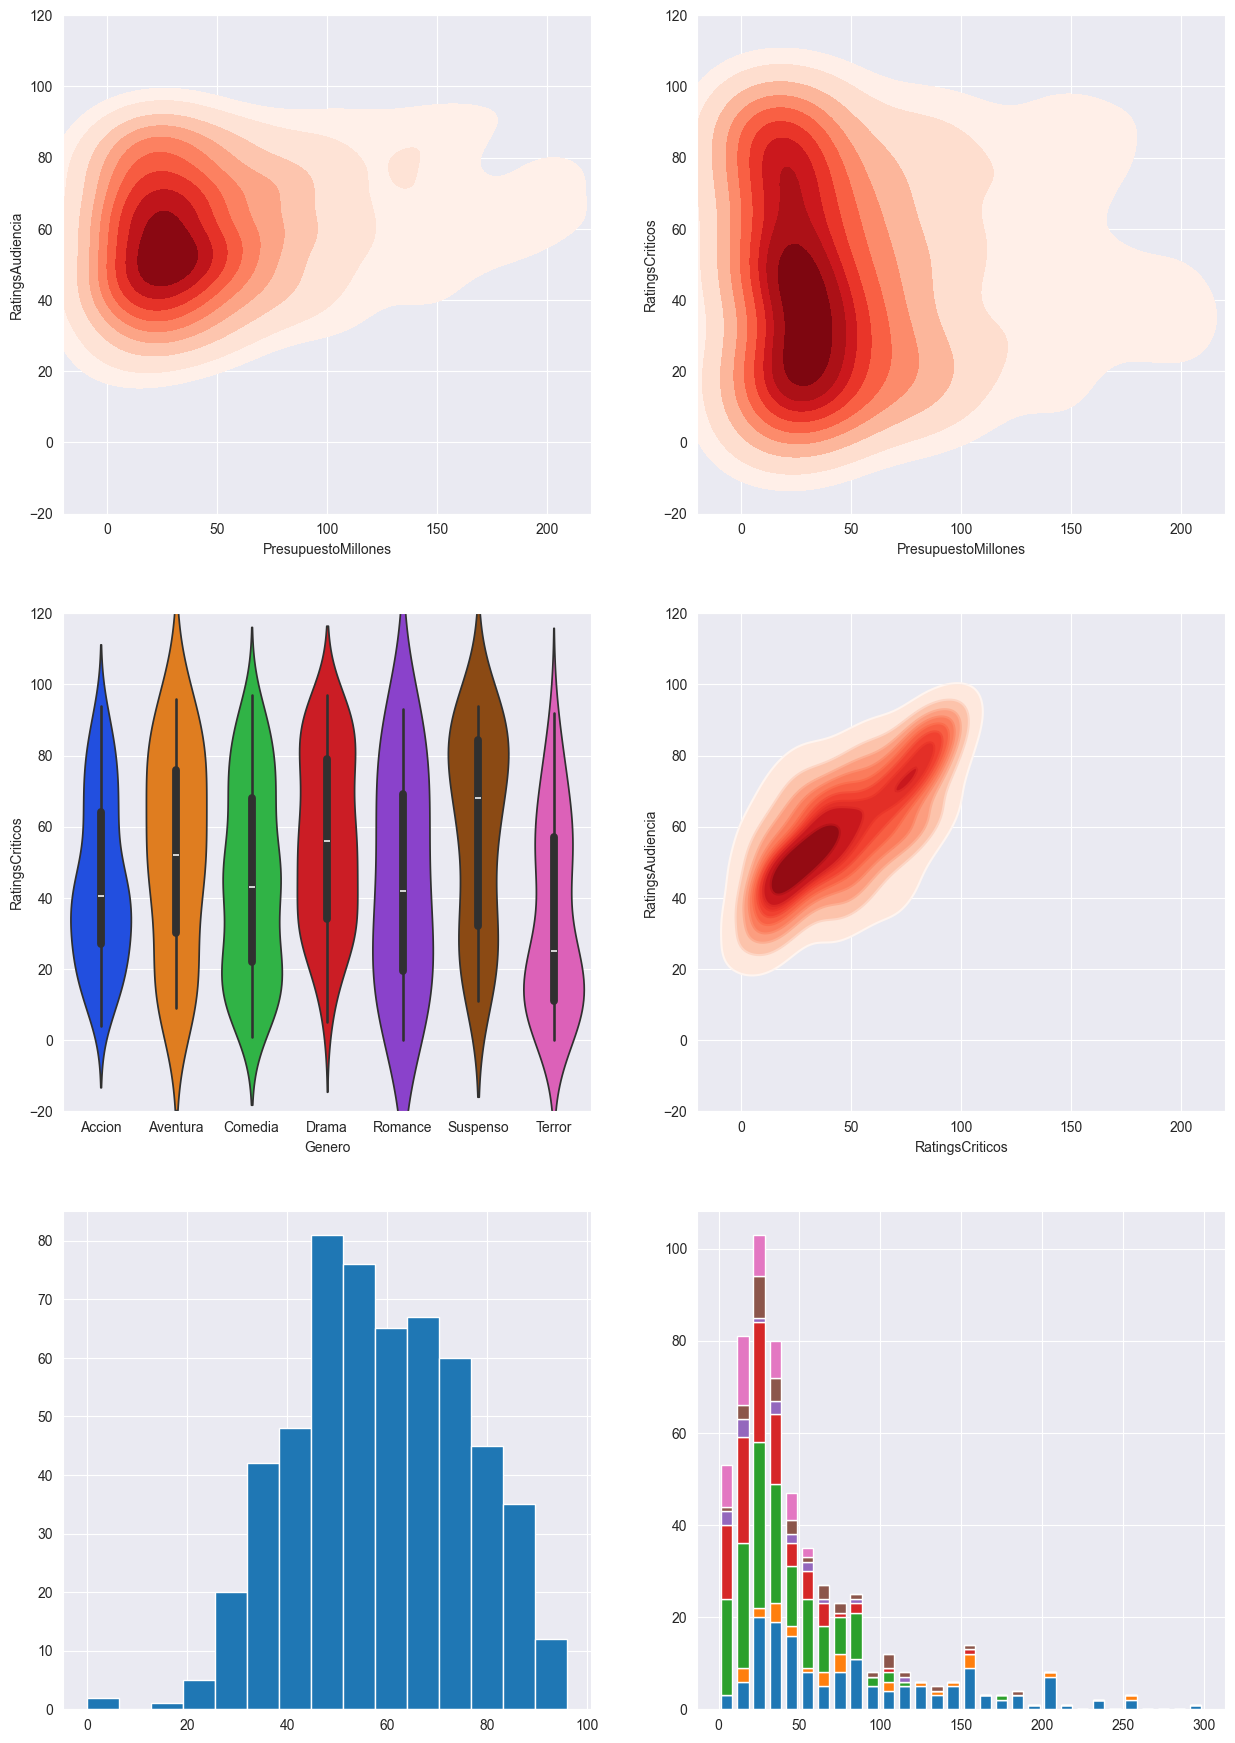

In [26]:
# Importando las bibliotecas necesarias para construir el Dashboard.
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Ignora las advertencias que puedan aparecer durante la ejecución del código

# Estableciendo el estilo del gráfico para mejorar su apariencia
sns.set_style("darkgrid")

# Creando una figura con múltiples subgráficos (3 filas y 2 columnas)
f, axes = plt.subplots(3, 2, figsize=(15, 22))  # Tamaño de la figura es 15x22 pulgadas

# Graficando la distribución de la audiencia según el presupuesto usando un gráfico KDE
vis3 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsAudiencia", shade=True, cmap="Reds", ax=axes[0, 0])
# Graficando la distribución de los críticos según el presupuesto usando un gráfico KDE
vis4 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsCriticos", shade=True, cmap="Reds", ax=axes[0, 1])

# Estableciendo los límites de los ejes X e Y para los gráficos KDE
vis3.set(xlim=(-20, 220), ylim=(-20, 120))
vis4.set(xlim=(-20, 220), ylim=(-20, 120))

# Graficando un gráfico de violín que muestra la distribución de Ratings de los críticos por género
vis5 = sns.violinplot(data=peliculas, x="Genero", y="RatingsCriticos", ax=axes[1, 0], palette="bright")
vis5.set(ylim=(-20, 120))  # Estableciendo el límite del eje Y para el gráfico de violín

# Graficando la relación entre Ratings de los críticos y Ratings de la audiencia con dos gráficos KDE
vis2B = sns.kdeplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", cmap="Reds", ax=axes[1, 1])
vis2 = sns.kdeplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", shade=True, cmap="Reds", ax=axes[1, 1])

# Estableciendo los límites de los ejes X e Y para los gráficos KDE
vis2B.set(xlim=(-20, 220), ylim=(-20, 120))
vis2.set(xlim=(-20, 220), ylim=(-20, 120))

# Graficando un histograma de Ratings de la audiencia
axes[2, 0].hist(peliculas.RatingsAudiencia, bins=15)  # Histograma con 15 bins

# Preparando un histograma apilado del presupuesto por género
lista1 = list()  # Lista para almacenar los datos de cada género
mis_etiquetas = list()  # Lista para almacenar las etiquetas de los géneros
for gen in peliculas.Genero.cat.categories:  # Iterando sobre cada categoría de género
    lista1.append(peliculas[peliculas.Genero == gen].PresupuestoMillones)  # Añadiendo los presupuestos por género a la lista
    mis_etiquetas.append(gen)  # Añadiendo el nombre del género a la lista de etiquetas

# Graficando el histograma apilado con los datos preparados anteriormente
axes[2, 1].hist(lista1, bins=30, stacked=True, rwidth=0.7, label=mis_etiquetas)  # Histograma apilado con 30 bins

# Mostrando todos los gráficos generados
plt.show()

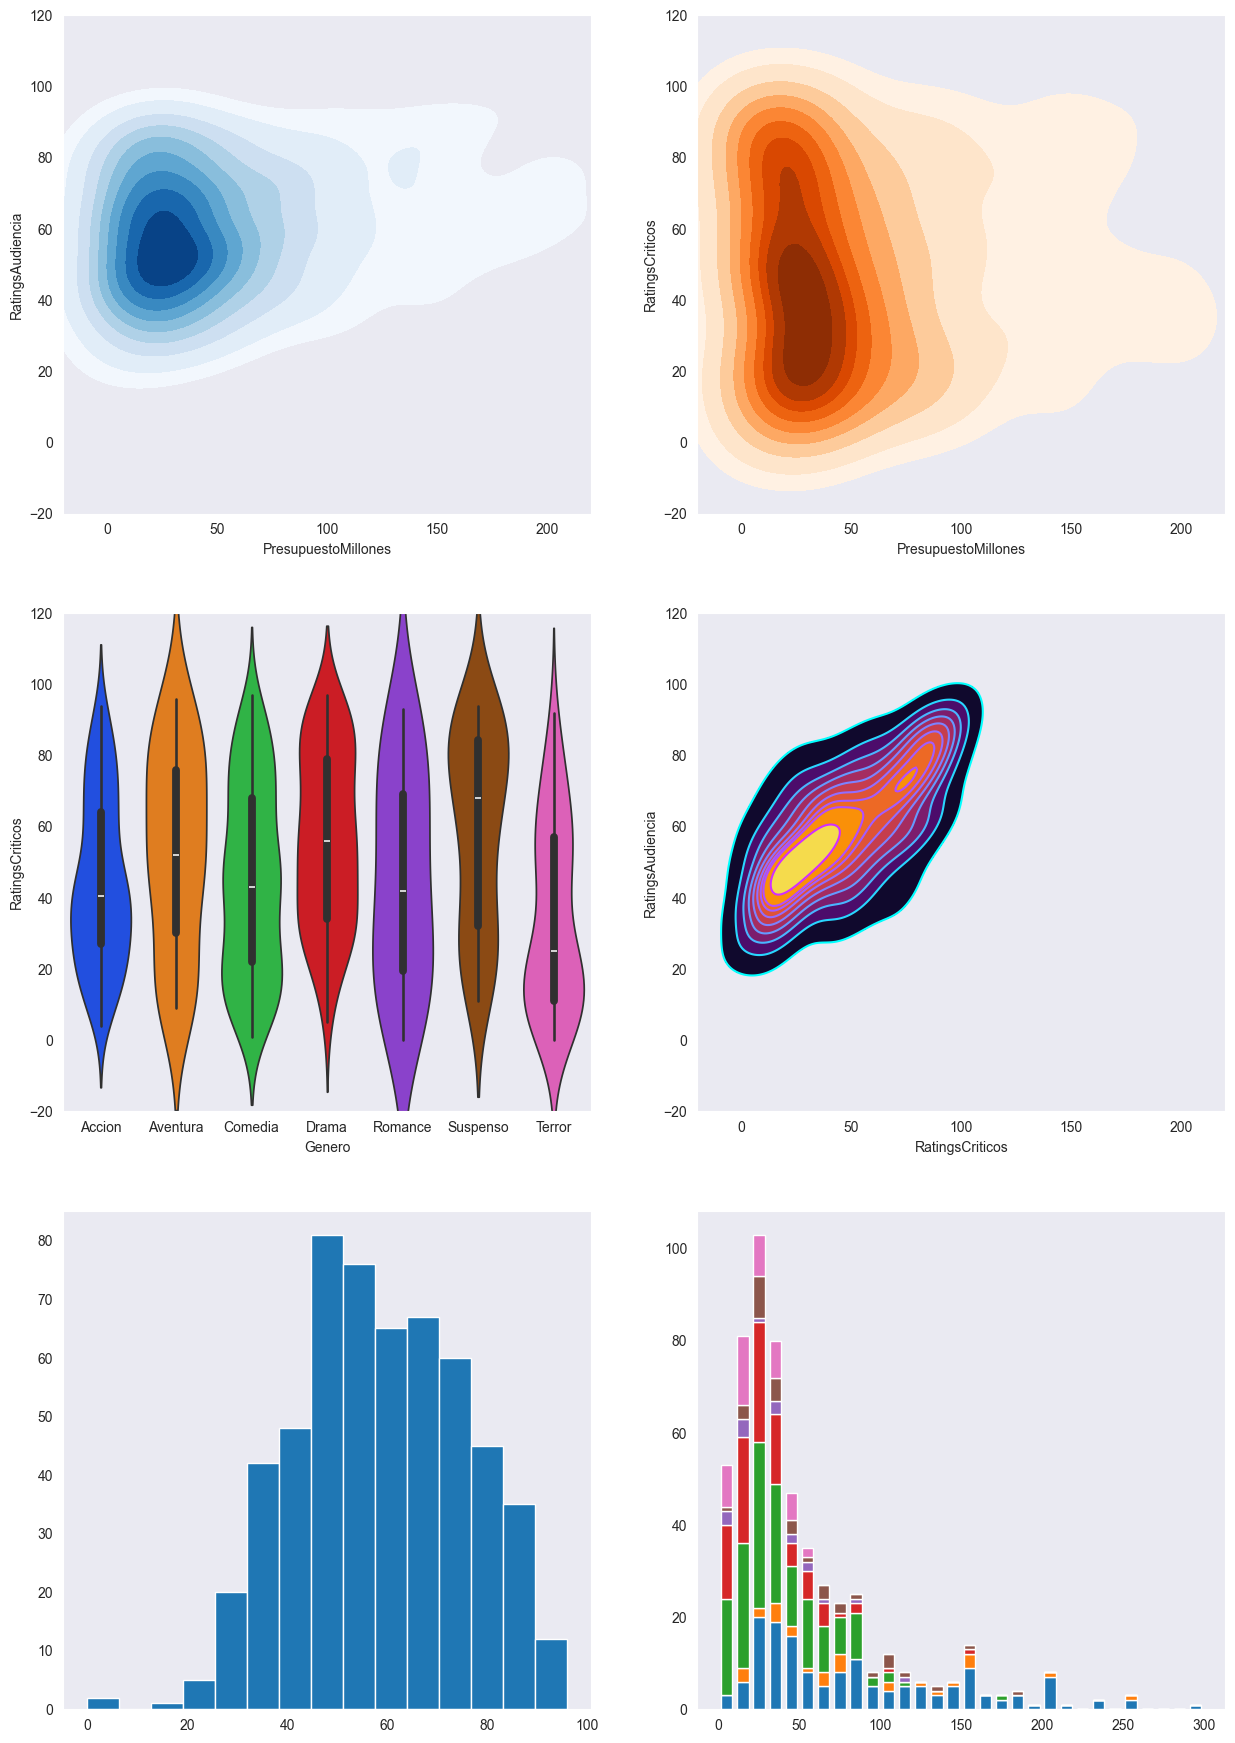

In [28]:
# Importando las bibliotecas necesarias para construir el Dashboard.
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Ignora las advertencias que puedan aparecer durante la ejecución del código

# Estableciendo el estilo del gráfico para mejorar su apariencia
sns.set_style("dark")

# Creando una figura con múltiples subgráficos (3 filas y 2 columnas)
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 22))  # Tamaño de la figura es 15x22 pulgadas

# Graficando la distribución de la audiencia según el presupuesto usando un gráfico KDE
vis3 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsAudiencia", shade=True, cmap="Blues", ax=axes[0, 0],
                )
# Graficando la distribución de los críticos según el presupuesto usando un gráfico KDE
vis4 = sns.kdeplot(data=peliculas, x="PresupuestoMillones", y="RatingsCriticos", shade=True, cmap="Oranges", ax=axes[0, 1])

# Estableciendo los límites de los ejes X e Y para los gráficos KDE
vis3.set(xlim=(-20, 220), ylim=(-20, 120))
vis4.set(xlim=(-20, 220), ylim=(-20, 120))

# Graficando un gráfico de violín que muestra la distribución de Ratings de los críticos por género
vis5 = sns.violinplot(data=peliculas, x="Genero", y="RatingsCriticos", ax=axes[1, 0], palette="bright")
vis5.set(ylim=(-20, 120))  # Estableciendo el límite del eje Y para el gráfico de violín

# Graficando la relación entre Ratings de los críticos y Ratings de la audiencia con dos gráficos KDE
vis2B = sns.kdeplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", cmap="cool", ax=axes[1, 1])
vis2 = sns.kdeplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", shade=True, cmap="inferno", ax=axes[1, 1])

# Estableciendo los límites de los ejes X e Y para los gráficos KDE
vis2B.set(xlim=(-20, 220), ylim=(-20, 120))
vis2.set(xlim=(-20, 220), ylim=(-20, 120))

# Graficando un histograma de Ratings de la audiencia
axes[2, 0].hist(peliculas.RatingsAudiencia, bins=15)  # Histograma con 15 bins

# Preparando un histograma apilado del presupuesto por género
lista1 = list()  # Lista para almacenar los datos de cada género
mis_etiquetas = list()  # Lista para almacenar las etiquetas de los géneros
for gen in peliculas.Genero.cat.categories:  # Iterando sobre cada categoría de género
    lista1.append(peliculas[peliculas.Genero == gen].PresupuestoMillones)  # Añadiendo los presupuestos por género a la lista
    mis_etiquetas.append(gen)  # Añadiendo el nombre del género a la lista de etiquetas

# Graficando el histograma apilado con los datos preparados anteriormente
axes[2, 1].hist(lista1, bins=30, stacked=True, rwidth=0.7, label=mis_etiquetas)  # Histograma apilado con 30 bins

# Mostrando todos los gráficos generados
plt.show()